# K Nearest Neighbor(KNN)

Made by Faris D. Qadri | 2021-07-28

Personal and professional use is allowed with permission from author.

[K Nearest Neighbor method explanation](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

[Source](https://www.mygreatlearning.com/blog/clustering-algorithms-in-machine-learning/)

[Data and code source](https://github.com/imhardikj/A-Model-a-Day/tree/master/K-Nearest%20Neighbors)



## Libraries

In [1]:
# Necessary liibraries

## Basic libraries
import pandas as pd
import numpy as np

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Train-Test split
from sklearn.model_selection import train_test_split

# Standard scaler
from sklearn.preprocessing import StandardScaler

## Model
from sklearn.neighbors import KNeighborsClassifier

## Model evaluation
from sklearn.metrics import classification_report,confusion_matrix

## Data

In [2]:
df = pd.read_csv("Classified Data.csv",index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

### Standarize the data

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [3]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [4]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

### Train-Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

## Choosing the best K

In [6]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

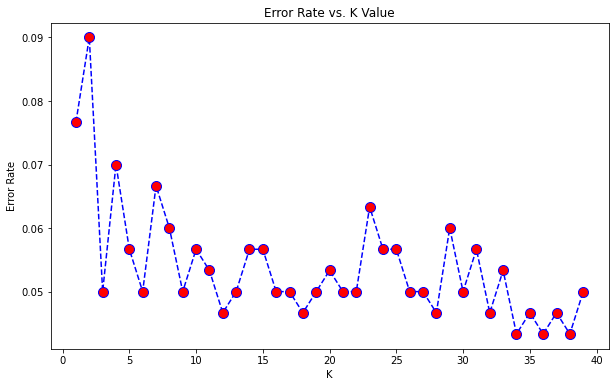

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>23 the error rate just tends to hover around 0.06-0.05, therefore K>23 is the best K that we are looking for.

## Model deployment

In [8]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [9]:
# Predicting
pred = knn.predict(X_test)

## Model evaluation

In [10]:
confusion_matrix(y_test,pred)

array([[150,   9],
       [ 10, 131]])

In [11]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

